In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('training.csv')

In [3]:
df.columns

Index(['class', 'GLCM_pan', 'Mean_Green', 'Mean_Red', 'Mean_NIR', 'SD_pan'], dtype='object')

In [4]:
X = df.copy()[['GLCM_pan', 'Mean_Green', 'Mean_Red', 'Mean_NIR', 'SD_pan']]

In [5]:
test_df = pd.read_csv('testing.csv')

In [6]:
test_X = test_df.copy()[['GLCM_pan', 'Mean_Green', 'Mean_Red', 'Mean_NIR', 'SD_pan']]

# Q1

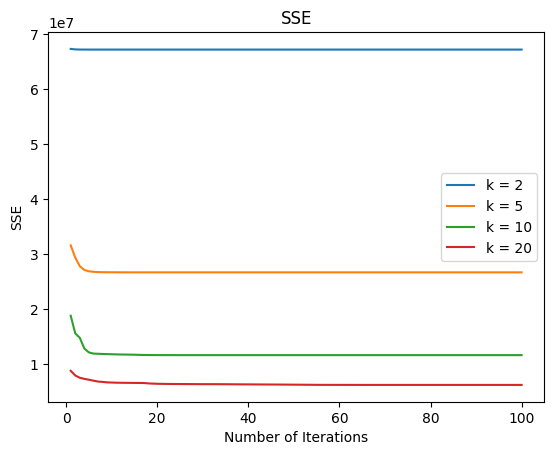

In [7]:
k_values = [2,5,10,20]
max_iter = 100

# Store SSE for each k and each iteration
sse_values = {k: [] for k in k_values}

# Apply k-means clustering for different values of k and calculate SSE
for k in k_values:
    for iteration in range(1, max_iter + 1):
        kmeans = KMeans(n_clusters=k, init = 'random', n_init=10, max_iter=iteration, random_state=42)
        kmeans.fit(X)
        sse_values[k].append(kmeans.inertia_)

# Plotting the results

for k in k_values:
    plt.plot(range(1, max_iter + 1), sse_values[k], label=f'k = {k}')
    
plt.title('SSE')
plt.xlabel('Number of Iterations')
plt.ylabel('SSE')
plt.legend()
plt.show()


# Q2

The SSE initially start falling significantly, as the number of iterations increases. The reason is that the positions of centroids are randomly chosen and the first few iterations make important adjustments to these positions. As the number of iterations continuous to increase, the SSE starts stabilizing because the positions of the centroids converge to a stable position.

As the value of k from K-means increases, the SSE decreases. That is because a larger K means the algorithm is able to capture more specific clusters of the data. As more specific centroids are used, the distance between data points and the positions of centroids will decrease. This may lead to overfitting.

# Q3

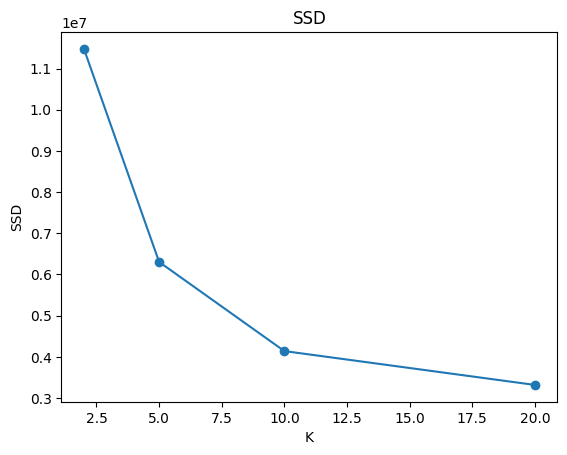

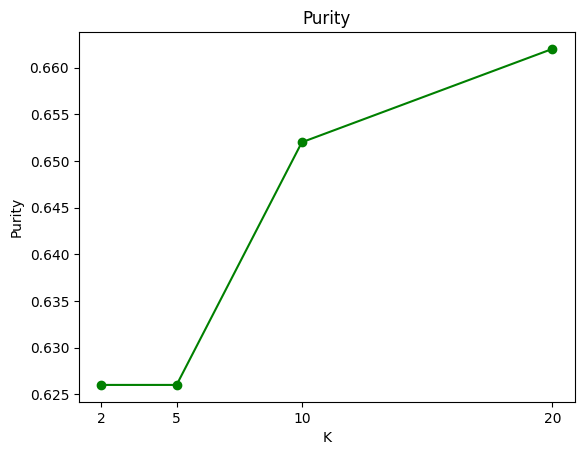

In [8]:
from sklearn.metrics import pairwise_distances_argmin_min
# Dictionary to store SSD for each k
ssd_values = {}
purity_values = []

# Compute SSD for test data on models trained with different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', n_init = 10, random_state=42)
    kmeans.fit(X)  # Training on the training data

    # Assign each test data point to the nearest cluster center and compute SSD
    _, distances = pairwise_distances_argmin_min(test_X, kmeans.cluster_centers_)
    ssd_values[k] = np.sum(distances**2)
    
    test_labels = kmeans.predict(test_X)
    
    # Calculate purity
    purity = 0
    for cluster in range(k):
        idx = (test_labels == cluster)
        if idx.sum() > 0:
            most_common = test_df[idx]['class'].value_counts().idxmax() # Find the most common value that can represent that cluster
            purity += (test_df[idx]['class'] == most_common).sum()
    purity /= len(test_df)
    purity_values.append(purity)
    
    
# Plotting ssd
plt.plot(list(ssd_values.keys()), list(ssd_values.values()), marker='o')
plt.title('SSD')
plt.xlabel('K')
plt.ylabel('SSD')
plt.show()


# Plotting purity
plt.plot(k_values, purity_values, marker='o', color='green')
plt.title('Purity')
plt.xlabel('K')
plt.ylabel('Purity')
plt.xticks(k_values)
plt.show()

# Q4

Best value for K: I believe the best value for k is 10 because there is an obvious improvement in both purity and SSD when K increases from 5 to 10. This suggests that the model is underfitting with a small value of K, like 2 or 5. From 10 to 20, the improvement in purity and SSD becomes smaller, which could lead to overfitting problems.

Obervation: As K increases, the SSD generally decreases and the purity also increases. However, a further increase of K might cause overfitting.